### Importing Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

In [95]:
data = pd.read_csv('C:\\Users\\dell\\Desktop\\study_data.csv')
data = data[:50]

### Data Exploration

In [96]:
data.head()

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,High
4,0.98,0.24,Low


In [97]:
data = data.drop(columns = 'knowledge_level')

In [98]:
data.head()

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.65,0.30
4,0.98,0.24


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
repetition_time    50 non-null float64
study_time         50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


In [100]:
data.describe()

,repetition_time,study_time
count,50.000000,50.000000
mean,0.389000,0.460000
std,0.250837,0.281932
min,0.000000,0.000000
25%,0.202500,0.250000
50%,0.305000,0.395000
75%,0.602500,0.667500
max,0.980000,0.900000


#### Let's plot

Text(0,0.5,'study_time')

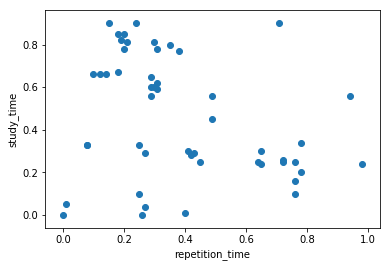

In [101]:
plt.scatter(data['repetition_time'], data['study_time'])
plt.xlabel('repetition_time')
plt.ylabel('study_time')

## Preparing input data

In [102]:
from sklearn import preprocessing
data_scaled = data.copy()
data_scaled = preprocessing.scale(data)
data_scaled[0:5]

array([[-1.56655021, -1.64816335],
       [-0.60004108,  1.57650408],
       [-0.55976987, -0.4657853 ],
       [ 1.05107868, -0.57327421],
       [ 2.38002873, -0.78825204]])

# <font color = "green">Elbow Method</font>

In [103]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 8):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

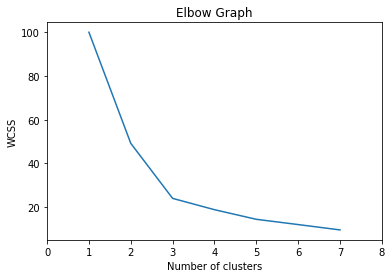

In [104]:
plt.plot(range(1, 8), wcss)
plt.xlim( 0, 8)  
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# <font color = "green">Dendogram</font>

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [118]:
Z = linkage(data_scaled,method="ward")

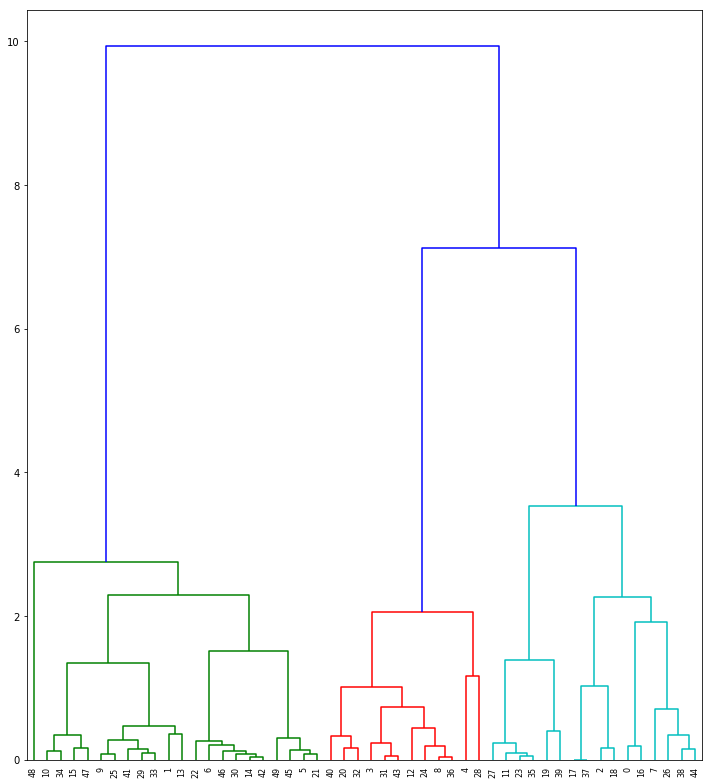

In [119]:
fig, ax = plt.subplots(figsize=(10, 11))
ax = dendrogram(Z)
plt.tight_layout()
plt.show()

# <font color = "green">Agglomerative Clustering</font>

### Training Model

In [108]:
from sklearn.cluster import AgglomerativeClustering
ag_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
ag_cluster.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000001859EE490D0>)

In [109]:
cluster_data= data.copy()
cluster_data['cluster_pred'] = ag_cluster.fit_predict(data_scaled)

### Clustering Labels

In [110]:
ag_cluster.labels_

array([0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 1, 1, 1, 1, 1], dtype=int64)

In [112]:
n_clusters_ = len(np.unique(ag_cluster.labels_))
n_clusters_

3

In [114]:
 cluster_data

,repetition_time,study_time,cluster_pred
0,0.00,0.00,0
1,0.24,0.90,1
2,0.25,0.33,0
3,0.65,0.30,2
4,0.98,0.24,2
5,0.10,0.66,1
6,0.29,0.56,1
7,0.40,0.01,0
8,0.72,0.25,2
9,0.20,0.85,1


### Visualisation

Text(0,0.5,'study_time')

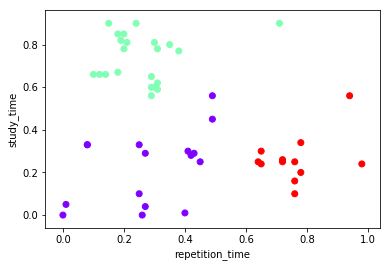

In [115]:
plt.scatter(data['repetition_time'], data['study_time'], c = cluster_data['cluster_pred'], cmap='rainbow')
plt.xlabel('repetition_time')
plt.ylabel('study_time')

**Keep Following and Practice more :)**

**GeeksforGeeks**